# <span style='font-family:Futura;font-weight:bold'>NOTEBOOK 5</span>

---

This notebook contains the codes used during the fifth lecture of the course <span style='color:SlateBlue;font-style:italic'>"Modelling from Measurements"</span>.

## <span style='font-family:Futura;font-weight:bold'>Exercise 5.1</span>

Let's consider the Lorenz equations:

\begin{align}
x' &= \sigma (y - x) \\
y' &= rx -y - xz \\
z' &= xy -bz
\end{align}

These equations are a simplified model of convection-driven atmospheric motion. They are very **sensitive to initial conditions** so that a small perturbation of them cause completely different trajectory.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

plt.rcParams.update({'font.size': 12})

In [2]:
dt = 0.01
t = np.linspace(0, 20, 20 / dt + 1)

sigma = 10
b = 8 / 3
r = 28

x0 = [5, 5, 5] # perfect I.C.

In [3]:
def lor_rhs(x, t, dummy, sigma, b, r):
    x1, x2, x3 = x
    rhs = [sigma * (x2 - x1),
           r * x1 - x2 - x1 * x3,
           x1 * x2 - b * x3]
    return rhs

In [4]:
x_sol = integrate.odeint(lor_rhs, x0, t, args=([], sigma, b, r), mxstep=10**8) # integrate PDE

<IPython.core.display.Javascript object>


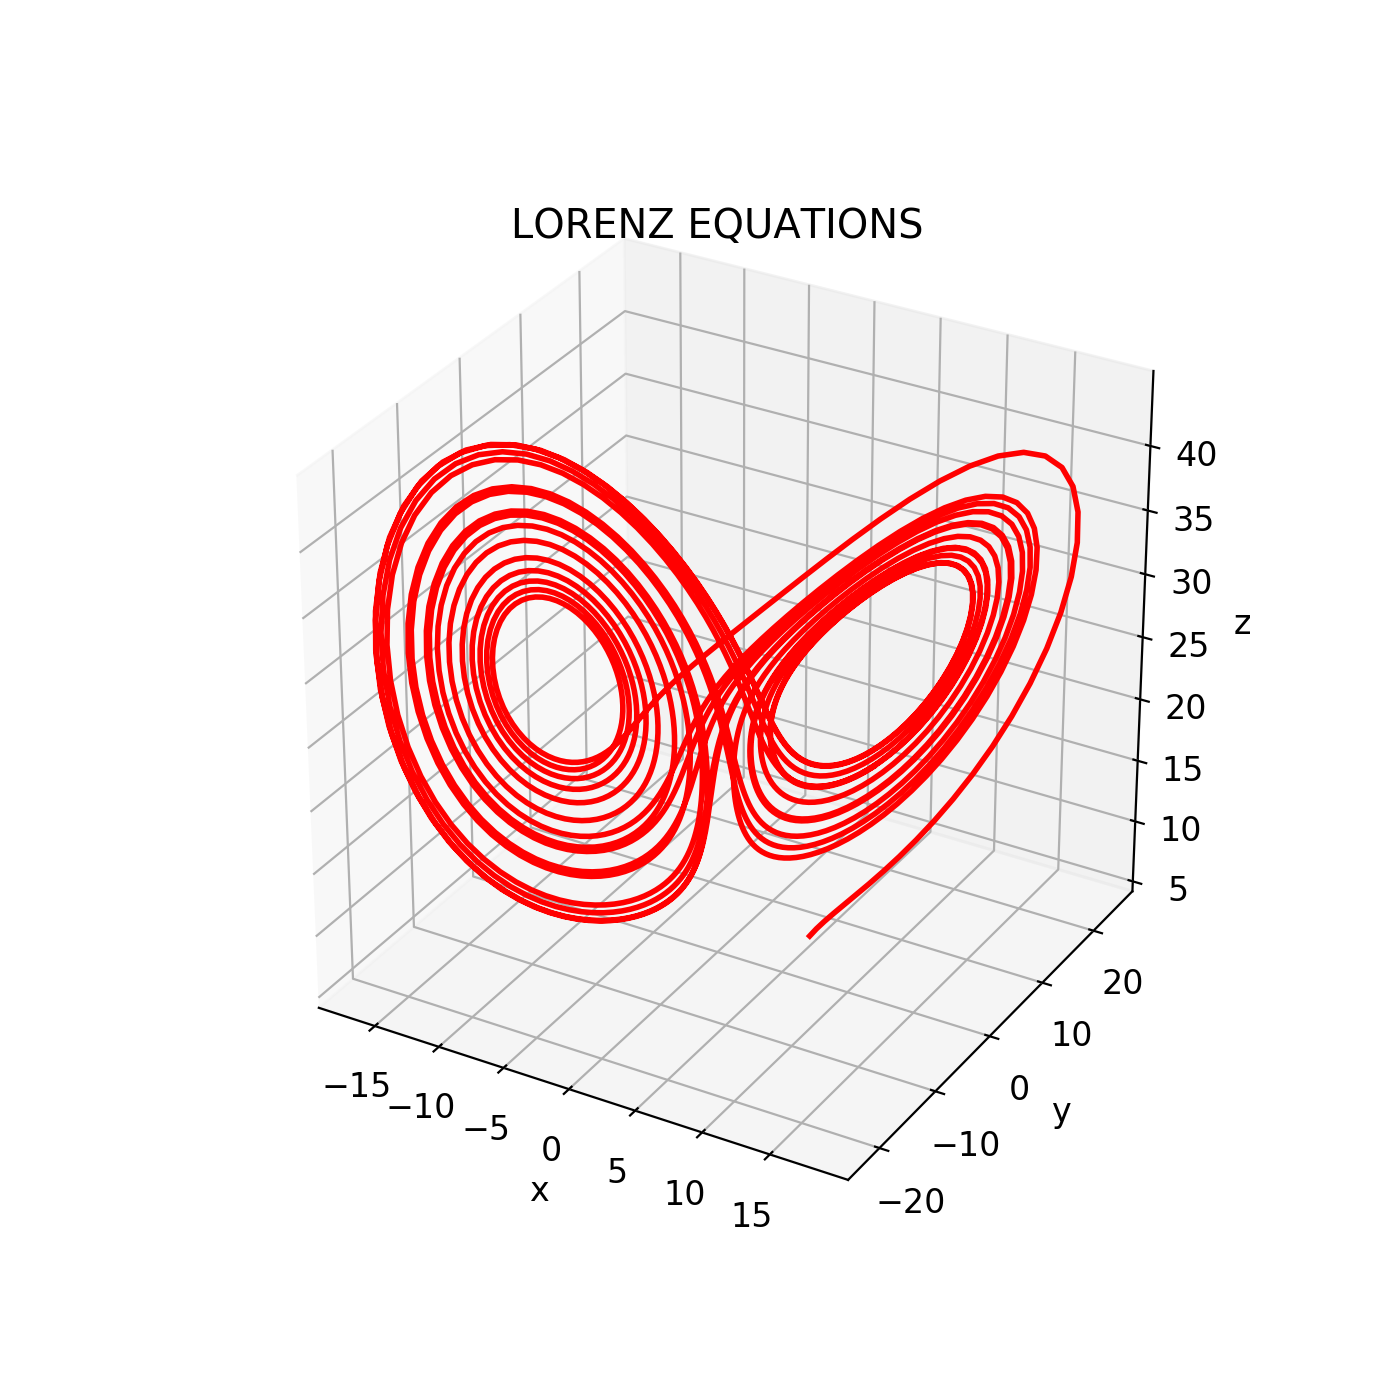

Text(0.5, 0.92, 'LORENZ EQUATIONS')

In [5]:
x_true = x_sol[:, 0]
y_true = x_sol[:, 1]
z_true = x_sol[:, 2]

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot(x_true, y_true, z_true, linewidth='2', color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('LORENZ EQUATIONS')

<IPython.core.display.Javascript object>


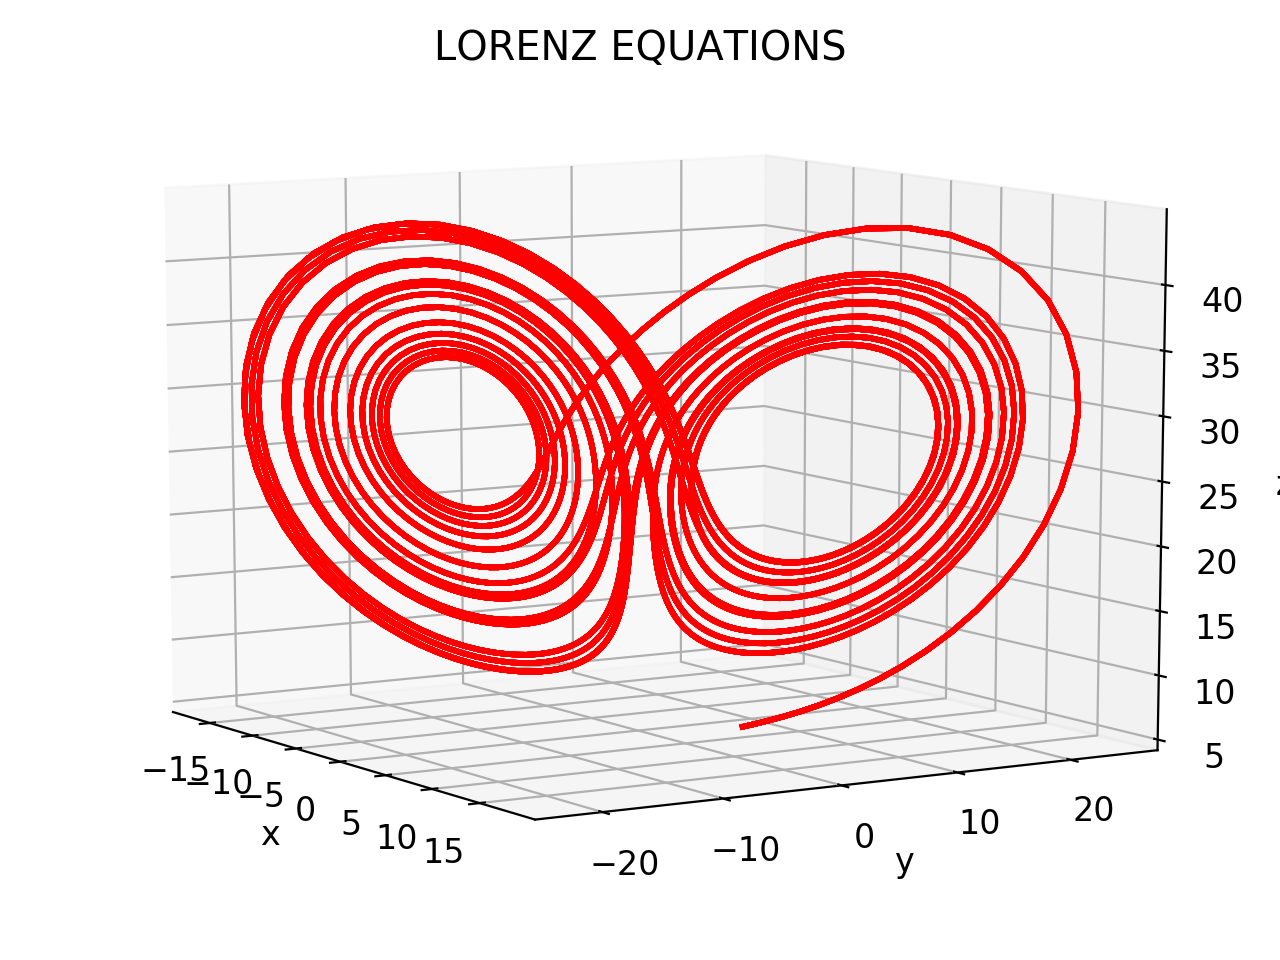

In [35]:
fig = plt.figure()
ax = Axes3D(fig)

def init():
    # Plot the surface.
    ax.plot(x_true, y_true, z_true, linewidth='2', color='r')
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('LORENZ EQUATIONS')
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)

ani.save('lorenz.gif',writer='imagemagick',fps=1000/50)

Now we will run the same equation for 8 times perturbing the initial conditions

<IPython.core.display.Javascript object>


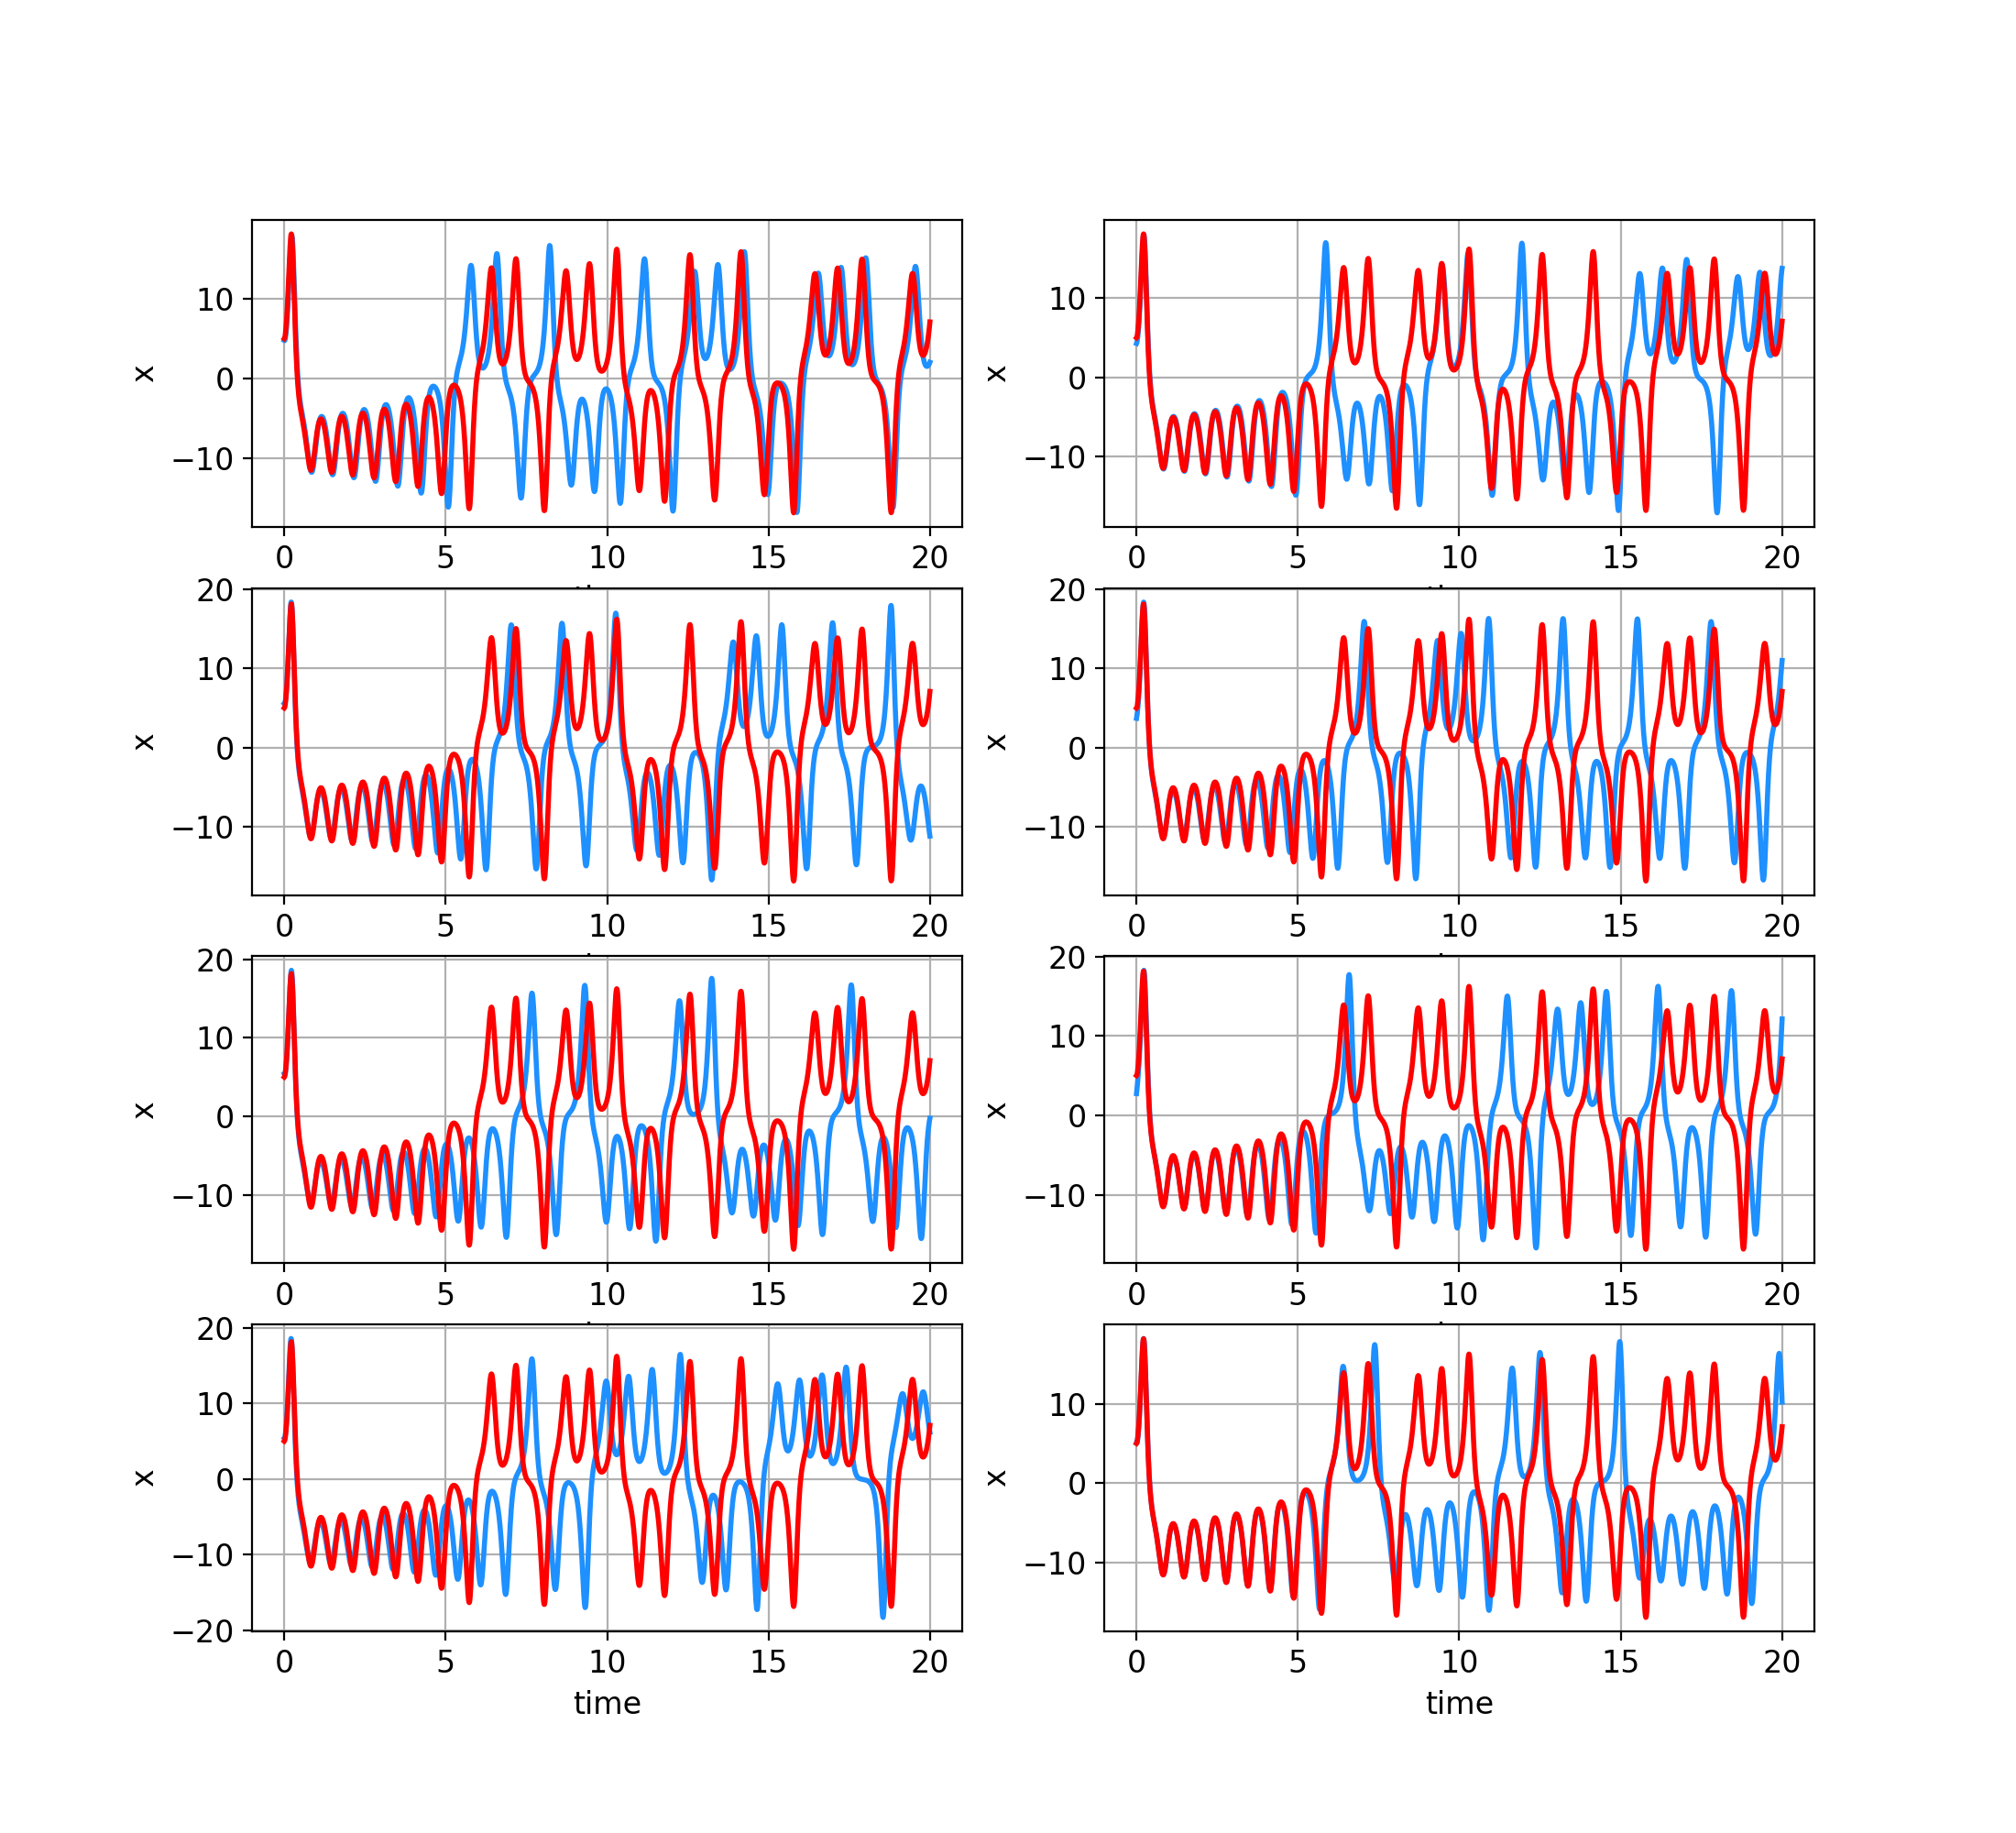

In [6]:
sigma2 = 1
trials = 8
fig = plt.figure(figsize=(11, 10))
ax = [fig.add_subplot(4, 2, k) for k in range(1,trials+1)]

for i in range(0, trials):
    xic = x0 + sigma2 * np.random.randn(len(x0),)
    x_sol_pert = integrate.odeint(lor_rhs, xic, t, args=([], sigma, b, r), mxstep=10**8) # integrate PDE
    ax[i].plot(t, x_sol_pert[:, 0], color='dodgerblue', linewidth=2)
    ax[i].plot(t, x_true, linewidth='2', color='r')
    ax[i].set_ylabel('x')
    ax[i].set_xlabel('time')
    ax[i].grid()

All the perturbed solutions start to diverge, i.e. decorrelate, around time 5. Our goal is to forecast for time higher than 5.

<IPython.core.display.Javascript object>


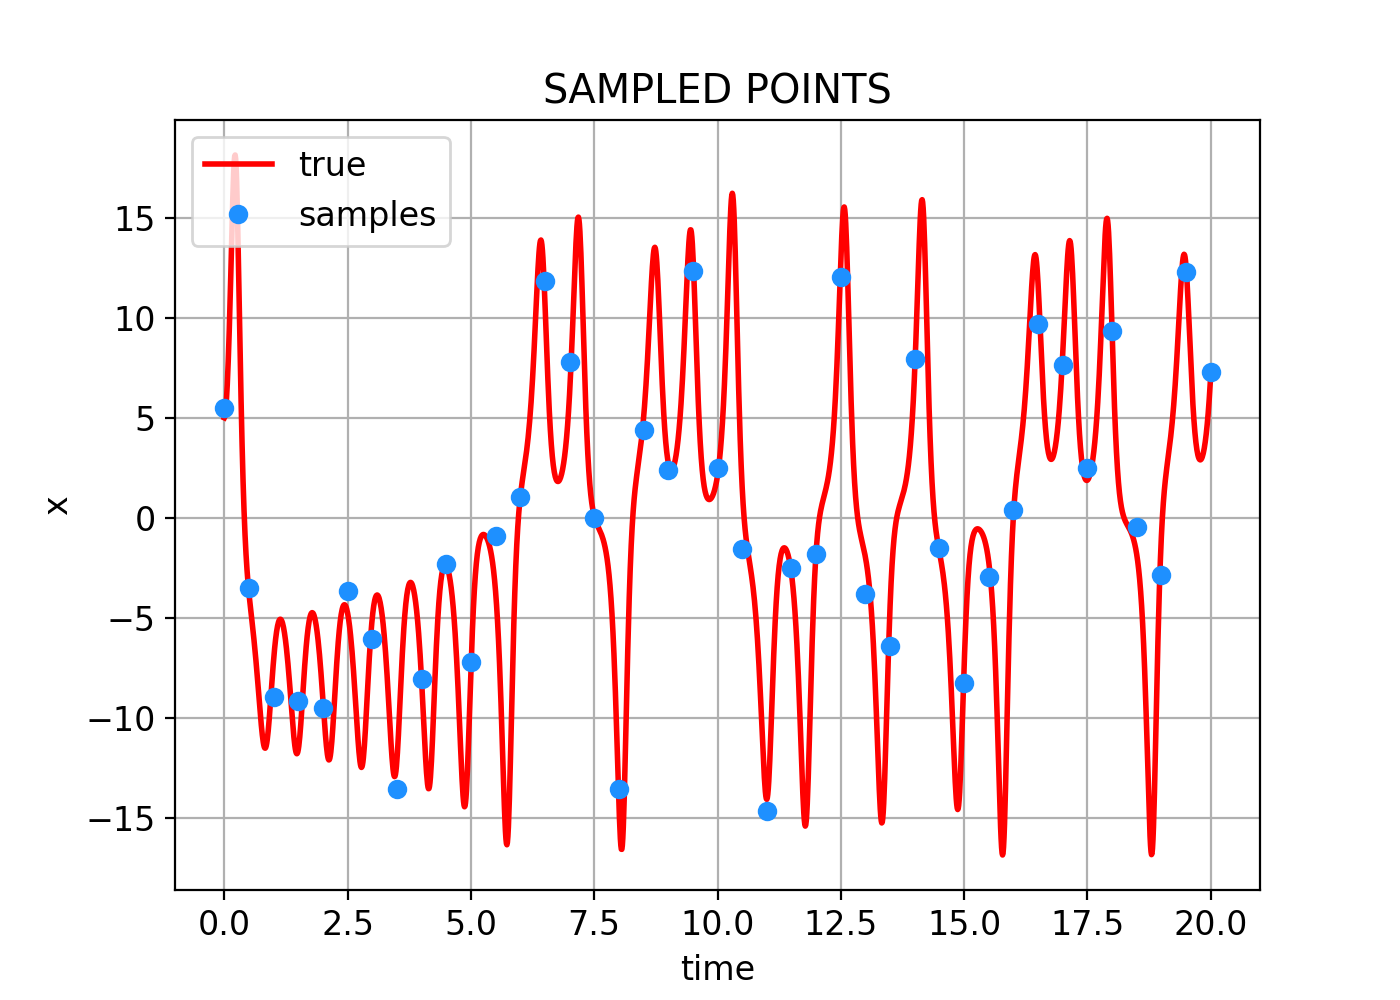

In [7]:
tdata = t[::50]
n = len(tdata)

sigma3 = 1

xdata = x_true[::50] + sigma3 * np.random.randn(n,);
ydata = y_true[::50] + sigma3 * np.random.randn(n,);
zdata = z_true[::50] + sigma3 * np.random.randn(n,);

fig = plt.figure(figsize=(7,5))
plt.plot(t, x_true, linewidth='2', color='r')
plt.plot(tdata, xdata, 'o', color='dodgerblue')
plt.xlabel('time')
plt.ylabel('x')
plt.title('SAMPLED POINTS')
plt.grid()
plt.legend(['true', 'samples'], loc='upper left')

In [8]:
x_da = np.empty(shape=(1,3),dtype='object') # data assimilation solution

for i in range(0, len(tdata)-1):
    tspan = np.linspace(0, 0.5, 0.5 / 0.01 + 1) # time between data collection
    x_sol = integrate.odeint(lor_rhs, xic, tspan, args=([], sigma, b, r), mxstep=10**8) # integrate PDE
    
    xic0 = np.array([x_sol[-1, 0], x_sol[-1, 1], x_sol[-1, 2]]) # model estimate
    
    xdat = np.array([xdata[i+1], ydata[i+1], zdata[i+1]]) # measurement estimate
    
    K = sigma2 / (sigma2 + sigma3) # Kalman filter
    
    xic = xic0 + K * (xdat - xic0)
    
    x_da = np.concatenate((x_da, x_sol[:-1, :]), axis=0)
    
x_da = np.concatenate((x_da, np.array([x_sol[-1,:]])), axis=0)

<IPython.core.display.Javascript object>


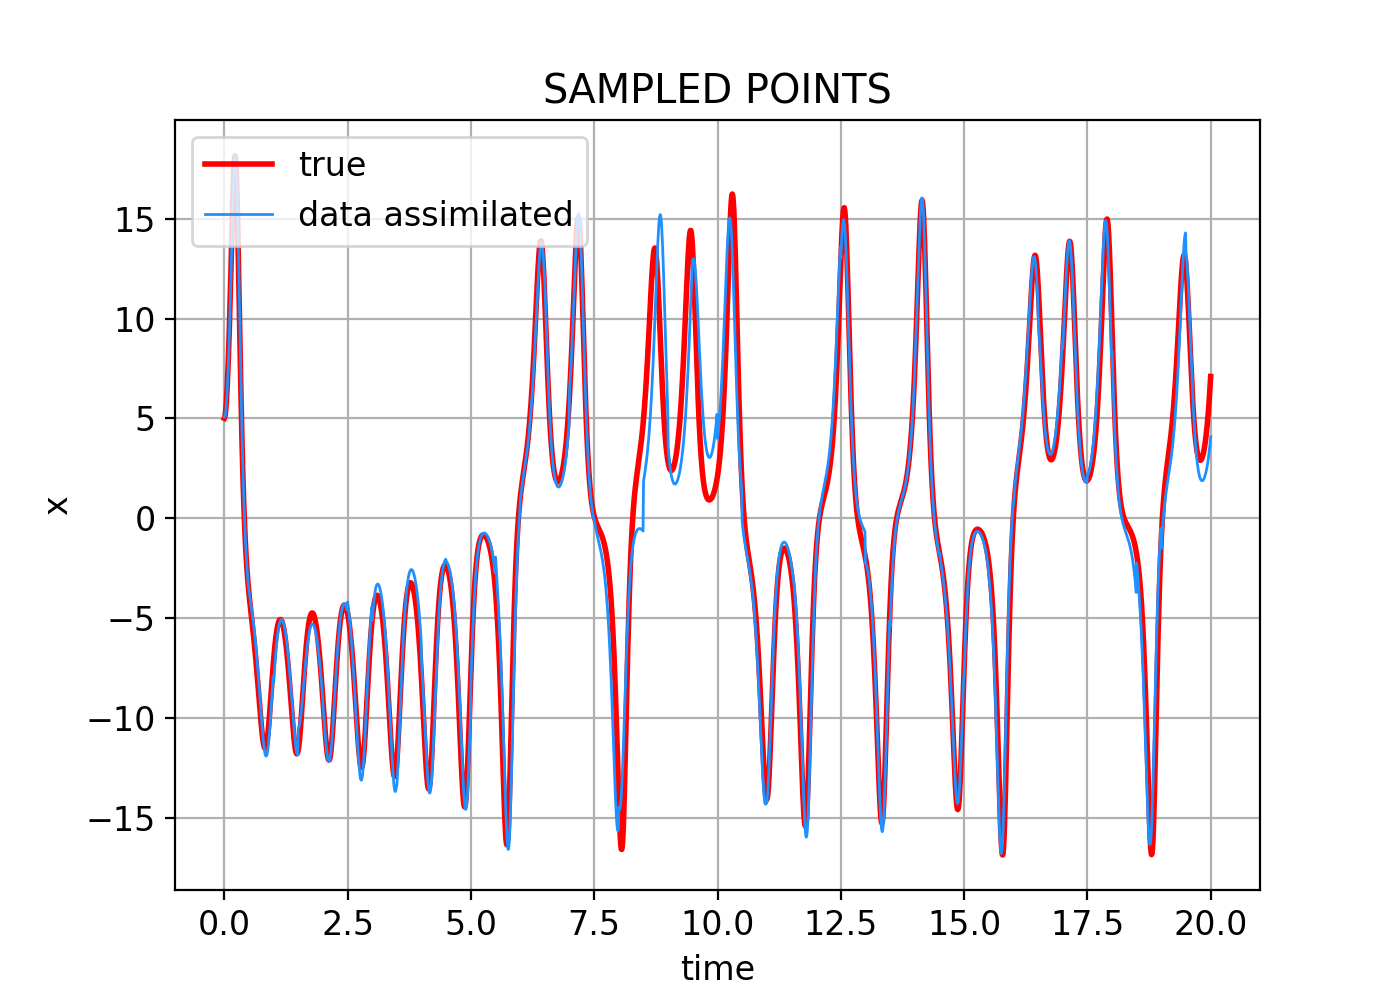

In [23]:
fig = plt.figure(figsize=(7,5))
plt.plot(t, x_true, linewidth='2', color='r')
plt.plot(t, x_da[1::, 0], linewidth='1', color='dodgerblue')
plt.xlabel('time')
plt.ylabel('x')
plt.title('SAMPLED POINTS')
plt.grid()
plt.legend(['true', 'data assimilated'], loc='upper left')